# Gráfico de Barras

Começando pelo básico.

Ver [exemplo](https://vega.github.io/vega/examples/bar-chart/)

In [3]:
from vega import Vega

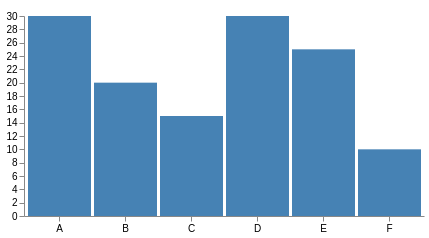

In [4]:
view = {
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Gráfico de barras iterativo",
  "width": 400, # nº de pixels
  "height": 200,
  "padding": 5,
  "data": [
        {
        "name": "Minha_Tabela",
        "values": [
          {"categoria": "A", "quantidade": 30},
          {"categoria": "B", "quantidade": 20},
          {"categoria": "C", "quantidade": 15},
          {"categoria": "D", "quantidade": 30},
          {"categoria": "E", "quantidade": 25},
          {"categoria": "F", "quantidade": 10}
        ]
      }
  ],

  "signals": [
    {
      "name": "tooltip",
      "description": "Quando mause passar em cima da barra a cor ficará vermelha e aparecerá o valor em cima da barra",
      "value": {},
      "on": [
          {"events": "rect:mouseover", "update": "datum"},
          {"events": "rect:mouseout", "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain":{"data": "Minha_Tabela", "field": "categoria" },
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "Minha_Tabela", "field": "quantidade"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    {"orient": "bottom", "scale": "xscale"},
    {"orient": "left", "scale": "yscale"}
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "Minha_Tabela"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "categoria"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "quantidade"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "#5AF9FE"}
        }
      }
    },

    {
      "type": "text",
      "encode":{
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill":{"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.categoria", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.quantidade", "offset": -2},
          "text": {"signal": "tooltip.quantidade"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }

  ]
}


Vega(view)